In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Levantamos los datasets para hacer reportes de los datos.

In [4]:
#Levantamos los datasets en crudo (archivos .csv)
df_clientes     =pd.read_csv('../Datasets/Clientes.csv'   , encoding='latin-1', sep=';')
df_compras      =pd.read_csv('../Datasets/Compra.csv'     , encoding='latin-1', sep=',')
df_gastos       =pd.read_csv('../Datasets/Gasto.csv'      , encoding='latin-1', sep=',')
df_localidades  =pd.read_csv('../Datasets/Localidades.csv', encoding='latin-1', sep=',')
df_proveedores  =pd.read_csv('../Datasets/Proveedores.csv', encoding='latin-1', sep=',')
df_sucursales   =pd.read_csv('../Datasets/Sucursales.csv' , encoding='latin-1', sep=';')
df_ventas       =pd.read_csv('../Datasets/Venta.csv'      , encoding='latin-1', sep=',')

In [5]:
df_clientes.drop(columns='col10', inplace=True)

## Reporte de Datos por Dataset

In [6]:
datasets = [df_clientes, df_compras, df_gastos, df_localidades, df_proveedores, df_sucursales, df_ventas]
names = ['df_clientes', 'df_compras', 'df_gastos', 'df_localidades', 'df_proveedores', 'df_sucursales', 'df_ventas']

Creamos una columna auxiliar a fin de detectar nulos dentro de los registros.

In [7]:
diccionario = {False: 0, True: 1}

for df in datasets:
    tiene_null = df.isna().any(axis=1)
    df['es_null'] = tiene_null
    df['es_null'] = df.es_null.map(diccionario)

## Vemos gráficamente la calidad de los datos

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


df_clientes


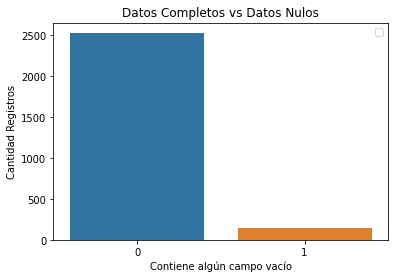

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


df_compras


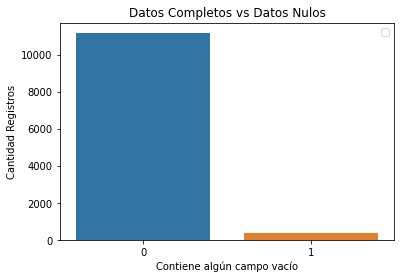

df_localidades


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


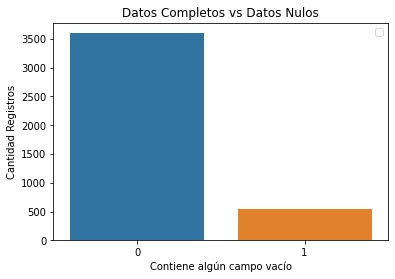

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


df_proveedores


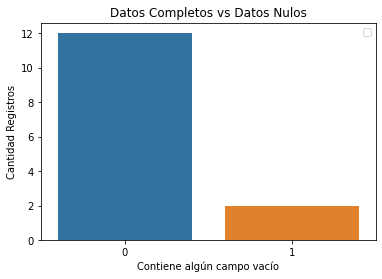

df_ventas


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


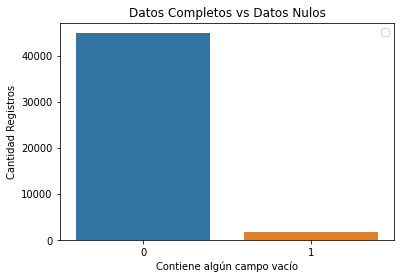

In [8]:
for i, df in enumerate(datasets):
    tiene_null = df.isna().sum().sum()
    if tiene_null > 0:
        print(names[i])
        sns.countplot(x="es_null", data=df)
        plt.title('Datos Completos vs Datos Nulos')
        plt.xlabel('Contiene algún campo vacío')
        plt.ylabel('Cantidad Registros')
        plt.legend()
        plt.show()

Podemos notar que la cantidad de registros con datos faltantes es relativamente baja con respecto a la cantidad de datos total dentro de los datasets.

## Detección de Outliers

Usaremos la **Regla de las Tres Sigmas** <br>
- mínimo = Promedio – 3 * Desviación Estándar
- máximo = Promedio + 3 * Desviación Estándar

df_compras -> Cantidad, Precio <br>
df_gastos  -> Monto <br>
df_ventas  -> Precio, Cantidad

**Compras** <br>
Una compra no debería tener cantidades ni precios negativos. Por otro lado, evaluaremos cúanto es un precio "normal" de compra para determinar el máximo.

In [96]:
promedio = df_compras['Precio'].mean()
std_dev = df_compras['Precio'].std()
minimo = 0
maximo = promedio + 3 * std_dev

Observamos que los outliers en el dataset de Compras se generan en el `precio`.

In [82]:
df_compras[(df_compras['Precio']<minimo) | (df_compras['Cantidad']<0)]

,IdCompra,Fecha,Fecha_AÃ±o,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor,es_null,Outlier


In [83]:
df_compras[df_compras['Precio']>maximo]

,IdCompra,Fecha,Fecha_AÃ±o,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor,es_null,Outlier
6507,6508,8/31/2018,2018,8,201808,42774,14,434491.0,9,0,False
6805,6806,10/26/2018,2018,1,201801,42773,2,577223.0,13,0,False
7414,7415,2/22/2019,2019,2,201902,42773,13,580886.0,6,0,False
7613,7614,4/26/2019,2019,4,201904,42917,33,10445800.0,11,0,False
8763,8764,11/29/2019,2019,1,201901,42779,17,688826.0,10,0,NaN
11272,11273,11/27/2020,2020,11,202011,42779,7,707004.0,8,0,NaN


In [97]:
mascara_outlier = ((df_compras['Precio']<minimo) | (df_compras['Cantidad']<0) | (df_compras['Precio']>maximo))

In [98]:
df_compras['Outlier'] = mascara_outlier

**Gastos** <br>

In [99]:
promedio = df_gastos['Monto'].mean()
std_dev = df_gastos['Monto'].std()
minimo = 0
maximo = promedio + 3 * std_dev

No posee outliers

In [87]:
df_gastos[(df_gastos['Monto']<minimo) | (df_gastos['Monto']>maximo)]

,IdGasto,IdSucursal,IdTipoGasto,Fecha,Monto,es_null


In [100]:
mascara_outlier = (df_gastos['Monto']<minimo) | (df_gastos['Monto']>maximo)

In [101]:
df_gastos['Outlier'] = mascara_outlier

**Venta**<br>

In [102]:
#Precio
promedio = df_ventas['Precio'].mean()
std_dev = df_ventas['Precio'].std()
minimo = 0
maximo = promedio + 3 * std_dev

In [91]:
df_ventas[(df_ventas['Precio']<minimo) | (df_ventas['Precio']>maximo)]

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad,es_null,Outlier
4864,4865,2018-08-03,2018-08-08,3,1537,2,1079,42932,1560000.0,1.0,0,True
7027,7028,2016-10-15,2016-10-20,1,2944,15,1724,42773,870364.0,2.0,0,True
9143,9144,2017-02-01,2017-02-08,1,1469,3,1012,42987,4560000.0,1.0,0,True
10995,10996,2018-05-08,2018-05-11,1,2034,4,1360,42773,870364.0,2.0,0,True
16232,16233,2019-11-08,2019-11-16,2,1996,7,1966,42779,955504.0,3.0,0,True
16465,16466,2020-01-20,2020-01-24,3,2754,7,1966,42782,33739200.0,1.0,0,True
20904,20905,2015-07-15,2015-07-16,3,144,10,2351,42811,25599200.0,2.0,0,True
26679,26680,2016-11-08,2016-11-09,3,2620,18,3664,42779,955504.0,2.0,0,True
32359,32360,2018-10-02,2018-10-10,2,1766,24,3751,42779,955504.0,2.0,0,True
35878,35879,2016-09-27,2016-10-01,3,373,25,3110,42779,955504.0,1.0,0,True


In [103]:
mascara_outlier = ((df_ventas['Precio']<minimo) | (df_ventas['Precio']>maximo))

In [104]:
df_ventas['Outlier'] = mascara_outlier

### Representación de Outliers

Vemos que **Compras** y **Ventas** poseen outliers en la columna `Precio`.

df_compras


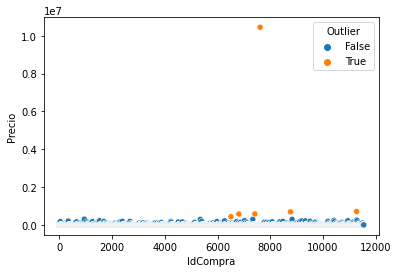

df_ventas


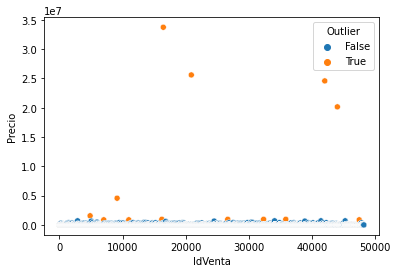

In [143]:
for i, df in enumerate(datasets):
    columns = list(df.columns)
    if 'Outlier' in columns:
        if df.Outlier.any():
            print(names[i])
            sns.scatterplot(x=df[columns[0]], y='Precio',hue='Outlier', data=df)
            plt.show()